In [35]:
import pdfplumber
import pandas as pd
import re
from pathlib import Path
from typing import List, Dict

def is_valid_date(token: str) -> bool:
    """Check if a string is a valid date."""
    return bool(re.match(r"^\d{1,2}[/\-]\d{1,2}[/\-]\d{4}$", token))

def clean_date(date_str: str) -> str:
    """Cleans and formats a date string properly to yyyy-mm-dd."""
    try:
        if "-" in date_str:
            day, month, year = map(int, date_str.split("-"))
        elif "/" in date_str:
            day, month, year = map(int, date_str.split("/"))
        else:
            return date_str
        return f"{year:04d}-{month:02d}-{day:02d}"
    except Exception:
        return date_str

def extract_detailed_calls_from_pdf(pdf_path: Path) -> pd.DataFrame:
    """
    Extracts detailed call records from a Radio Ergo audience feedback PDF.
    
    Args:
        pdf_path (Path): Path to the PDF file.
        
    Returns:
        pd.DataFrame: DataFrame with columns: date, location, theme, remarks.
    """
    call_records = []
    current_record = None
    inside_calls_section = False

    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text()
            if not text:
                continue

            lines = text.splitlines()

            for line in lines:
                line = line.strip()
                if not line:
                    continue

                # Detect header to start
                if not inside_calls_section and "Date Location" in line and "Theme" in line:
                    inside_calls_section = True
                    continue

                if inside_calls_section:
                    tokens = line.split(maxsplit=4)
                    
                    if len(tokens) < 5:
                        # Probably a continuation of previous remark
                        if current_record:
                            current_record["remarks"] += " " + line
                        continue

                    # Check if first token is a date
                    if is_valid_date(tokens[0]):
                        # Save previous record if any
                        if current_record:
                            call_records.append(current_record)

                        date_raw, location, gender, theme, remarks = tokens
                        current_record = {
                            "date": clean_date(date_raw),
                            "location": location.strip(),
                            "theme": theme.strip(),
                            "remarks": remarks.strip()
                        }
                    else:
                        # Not a date - continuation line
                        if current_record:
                            current_record["remarks"] += " " + line

    # Append last record
    if current_record:
        call_records.append(current_record)

    return pd.DataFrame(call_records)

# -------- Now process all PDFs --------

# Your directory
pdf_dir = Path("/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/radio_ergo_weekly_feedback")

# List all PDFs
pdf_files = list(pdf_dir.glob("*.pdf"))
print(f"Found {len(pdf_files)} PDF files.")

# Extract from each PDF and combine
all_calls = pd.DataFrame()

for pdf_file in pdf_files:
    try:
        calls_df = extract_detailed_calls_from_pdf(pdf_file)
        all_calls = pd.concat([all_calls, calls_df], ignore_index=True)
        print(f"Processed: {pdf_file.name} ({len(calls_df)} calls)")
    except Exception as e:
        print(f"Failed to process {pdf_file.name}: {e}")

# Preview the full combined dataset
print(all_calls.head())

# Save to CSV
output_file = pdf_dir / "radio_ergo_feedback_calls.csv"
all_calls.to_csv(output_file, index=False)
print(f"Saved all extracted calls to {output_file}")


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Found 10 PDF files.


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: Radio Ergo audience feedback report 1-7 August 2024 .pdf (92 calls)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: Radio Ergo audience feedback report 11-17 July 2024-.pdf (92 calls)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: Radio Ergo audience feedback report 27 June-3 July 2024.pdf (79 calls)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: Radio Ergo audience feedback report 4-10 July 2024.pdf (86 calls)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: Radio Ergo audience feedback report_25-31_July_2024.pdf (81 calls)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: Radio Ergo audience feedback_12-18_Sept_2024.pdf (91 calls)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: Radio Ergo audience feedback_15-21_August_2024.pdf (86 calls)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: Radio Ergo audience feedback_19-25_Sept_2024.pdf (93 calls)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: Radio Ergo audience feedback_8-14_August_2024.pdf (82 calls)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


Processed: RadioErgo_audience_feedback_report_18-24 July 2024.pdf (82 calls)
         date  location         theme  \
0  2024-08-05      Sool  Aid/Conflict   
1  2024-08-05  Galgadud           Aid   
2  2024-08-05  Galmudug           Aid   
3  2024-08-04     Hiran        Floods   
4  2024-08-05     Hiran        Floods   

                                             remarks  
0  need the humanitarian organisations to reach u...  
1  got anything. That is my message. Thank you. H...  
2  and deliver aid. Beledweyne Hello Radio Ergo, ...  
3  flooding. We need water catchment areas where ...  
4  know how we can protect our farms from recurri...  
Saved all extracted calls to /teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/radio_ergo_weekly_feedback/radio_ergo_feedback_calls.csv


In [36]:
all_calls

date    location         theme  \
0    2024-08-05        Sool  Aid/Conflict   
1    2024-08-05    Galgadud           Aid   
2    2024-08-05    Galmudug           Aid   
3    2024-08-04       Hiran        Floods   
4    2024-08-05       Hiran        Floods   
..          ...         ...           ...   
859  2024-07-21       Hiran          Rain   
860  2024-07-22  M.Shabelle          Rain   
861  2024-07-24  M.Shabelle          Rain   
862  2024-07-22    Shabelle          Rain   
863  2024-07-21  L.Shabelle          Rain   

                                               remarks  
0    need the humanitarian organisations to reach u...  
1    got anything. That is my message. Thank you. H...  
2    and deliver aid. Beledweyne Hello Radio Ergo, ...  
3    flooding. We need water catchment areas where ...  
4    know how we can protect our farms from recurri...  
..                                                 ...  
859  Hello Radio Ergo, my name is H. in Beledweyne....  
860                    growing well. Thank you. Jowhar  
861  Hello Radio Ergo, my name is S. in Jowhar. We ...  
862  Our livestock and crops are doing well. Thank ...  
863    are getting water and fodder. Thank you. 8 9 10  

[864 rows x 4 columns]

In [38]:
import re

def normalize_location_name(name: str) -> str:
    """
    Normalize location names for matching:
    - Lowercase
    - Remove 'region', 'urban', 'district'
    - Remove extra whitespace
    - Capitalize properly
    
    Args:
        name (str): Raw location name
    
    Returns:
        str: Normalized location name
    """
    if not isinstance(name, str):
        return name

    # Lowercase
    name = name.lower()

    # Remove common words
    name = re.sub(r'\b(region|urban|district)\b', '', name)

    # Remove any non-alphabetical characters except spaces
    name = re.sub(r'[^a-z\s]', '', name)

    # Remove multiple spaces
    name = re.sub(r'\s+', ' ', name).strip()

    # Capitalize first letters
    name = name.title()

    return name


In [40]:
# Create a new column 'location_normalized'
all_calls["location_normalized"] = all_calls["location"].apply(normalize_location_name)

# Preview
print(all_calls[["location", "location_normalized"]].head(20))


      location location_normalized
0         Sool                Sool
1     Galgadud            Galgadud
2     Galmudug            Galmudug
3        Hiran               Hiran
4        Hiran               Hiran
5        Hiran               Hiran
6        Hiran               Hiran
7        Hiran               Hiran
8     Shabelle            Shabelle
9      Togdher             Togdher
10       Lower               Lower
11        Gedo                Gedo
12       Hiran               Hiran
13     Central             Central
14  L.Shabelle           Lshabelle
15     Togdher             Togdher
16  Somaliland          Somaliland
17    Galgadud            Galgadud
18    Galgadud            Galgadud
19       Hiran               Hiran


In [41]:
all_calls

date    location         theme  \
0    2024-08-05        Sool  Aid/Conflict   
1    2024-08-05    Galgadud           Aid   
2    2024-08-05    Galmudug           Aid   
3    2024-08-04       Hiran        Floods   
4    2024-08-05       Hiran        Floods   
..          ...         ...           ...   
859  2024-07-21       Hiran          Rain   
860  2024-07-22  M.Shabelle          Rain   
861  2024-07-24  M.Shabelle          Rain   
862  2024-07-22    Shabelle          Rain   
863  2024-07-21  L.Shabelle          Rain   

                                               remarks location_normalized  
0    need the humanitarian organisations to reach u...                Sool  
1    got anything. That is my message. Thank you. H...            Galgadud  
2    and deliver aid. Beledweyne Hello Radio Ergo, ...            Galmudug  
3    flooding. We need water catchment areas where ...               Hiran  
4    know how we can protect our farms from recurri...               Hiran  
..                                                 ...                 ...  
859  Hello Radio Ergo, my name is H. in Beledweyne....               Hiran  
860                    growing well. Thank you. Jowhar           Mshabelle  
861  Hello Radio Ergo, my name is S. in Jowhar. We ...           Mshabelle  
862  Our livestock and crops are doing well. Thank ...            Shabelle  
863    are getting water and fodder. Thank you. 8 9 10           Lshabelle  

[864 rows x 5 columns]

In [43]:
def create_impact_signals(feedback_df: pd.DataFrame) -> pd.DataFrame:
    """
    Create impact signals based on theme and remarks.

    Args:
        feedback_df (pd.DataFrame): Feedback dataframe.

    Returns:
        pd.DataFrame: Updated DataFrame with impact signal columns.
    """
    # Lowercase everything for easier detection
    feedback_df["theme_lower"] = feedback_df["theme"].str.lower().fillna("")
    feedback_df["remarks_lower"] = feedback_df["remarks"].str.lower().fillna("")
    
    # Define impact detection
    feedback_df["drought_warning"] = feedback_df["remarks_lower"].str.contains(r"\bdrought\b|\bwater shortage\b|\bdry\b", regex=True).astype(int)
    feedback_df["flood_risk"] = feedback_df["remarks_lower"].str.contains(r"\bflood\b|\briver\b|\boverflow\b", regex=True).astype(int)
    feedback_df["aid_request"] = feedback_df["remarks_lower"].str.contains(r"\baid\b|\bhelp\b|\bassistance\b|\bdisplacement\b|\bidp\b", regex=True).astype(int)
    feedback_df["livestock_disease"] = feedback_df["remarks_lower"].str.contains(r"\blivestock\b|\bgoats\b|\bsick\b|\bdisease\b|\bcattle\b|\bdeath\b", regex=True).astype(int)
    feedback_df["rainfall_positive"] = feedback_df["remarks_lower"].str.contains(r"\brain\b|\brainfall\b|\bgood rain\b", regex=True).astype(int)
    
    # Drop helper columns
    feedback_df = feedback_df.drop(columns=["theme_lower", "remarks_lower"])

    return feedback_df


In [44]:
feedback_calls_df = create_impact_signals(all_calls)

# Preview with the new signals
print(feedback_calls_df[["date", "location", "theme", "drought_warning", "flood_risk", "aid_request", "livestock_disease", "rainfall_positive"]].head(10))


         date  location         theme  drought_warning  flood_risk  \
0  2024-08-05      Sool  Aid/Conflict                0           0   
1  2024-08-05  Galgadud           Aid                0           0   
2  2024-08-05  Galmudug           Aid                0           0   
3  2024-08-04     Hiran        Floods                0           0   
4  2024-08-05     Hiran        Floods                0           0   
5  2024-08-07     Hiran        Floods                0           0   
6  2024-08-02     Hiran        Floods                0           1   
7  2024-08-01     Hiran        Floods                0           0   
8  2024-08-07  Shabelle        Floods                0           0   
9  2024-08-07   Togdher      Forecast                0           0   

   aid_request  livestock_disease  rainfall_positive  
0            1                  0                  0  
1            1                  0                  0  
2            1                  0                  0  
3        

In [45]:
feedback_calls_df

date    location         theme  \
0    2024-08-05        Sool  Aid/Conflict   
1    2024-08-05    Galgadud           Aid   
2    2024-08-05    Galmudug           Aid   
3    2024-08-04       Hiran        Floods   
4    2024-08-05       Hiran        Floods   
..          ...         ...           ...   
859  2024-07-21       Hiran          Rain   
860  2024-07-22  M.Shabelle          Rain   
861  2024-07-24  M.Shabelle          Rain   
862  2024-07-22    Shabelle          Rain   
863  2024-07-21  L.Shabelle          Rain   

                                               remarks location_normalized  \
0    need the humanitarian organisations to reach u...                Sool   
1    got anything. That is my message. Thank you. H...            Galgadud   
2    and deliver aid. Beledweyne Hello Radio Ergo, ...            Galmudug   
3    flooding. We need water catchment areas where ...               Hiran   
4    know how we can protect our farms from recurri...               Hiran   
..                                                 ...                 ...   
859  Hello Radio Ergo, my name is H. in Beledweyne....               Hiran   
860                    growing well. Thank you. Jowhar           Mshabelle   
861  Hello Radio Ergo, my name is S. in Jowhar. We ...           Mshabelle   
862  Our livestock and crops are doing well. Thank ...            Shabelle   
863    are getting water and fodder. Thank you. 8 9 10           Lshabelle   

     drought_warning  flood_risk  aid_request  livestock_disease  \
0                  0           0            1                  0   
1                  0           0            1                  0   
2                  0           0            1                  0   
3                  0           0            0                  0   
4                  0           0            0                  0   
..               ...         ...          ...                ...   
859                0           0            0                  0   
860                0           0            0                  0   
861                0           0            0                  0   
862                0           0            0                  1   
863                0           0            0                  0   

     rainfall_positive  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
859                  1  
860                  0  
861                  1  
862                  1  
863                  0  

[864 rows x 10 columns]

In [46]:
def infer_impact_level(row) -> str:
    """
    Infer the impact level ('high', 'medium', 'low') from theme and detected signals.

    Args:
        row (pd.Series): A row from feedback_calls_df.

    Returns:
        str: Impact level.
    """
    theme = str(row["theme"]).lower()
    
    if row["drought_warning"] == 1 or "drought" in theme:
        return "high"
    if row["flood_risk"] == 1 or "flood" in theme:
        return "high"
    if "conflict" in theme:
        return "high"
    if row["livestock_disease"] == 1 or "livestock" in theme:
        return "medium"
    if row["rainfall_positive"] == 1 or "rain" in theme:
        return "low"
    if row["aid_request"] == 1 or "aid" in theme:
        return "low"
    if "environment" in theme:
        return "medium"
    
    return "unknown"  # fallback if nothing matches


In [47]:
feedback_calls_df["impact_level"] = feedback_calls_df.apply(infer_impact_level, axis=1)


In [48]:
def match_location_to_geo_df(feedback_df: pd.DataFrame, geo_df: pd.DataFrame) -> pd.DataFrame:
    """
    Match normalized locations to geo_df areas (group_name first, area fallback).

    Args:
        feedback_df (pd.DataFrame): The feedback DataFrame with 'location_normalized'.
        geo_df (gpd.GeoDataFrame): The IPC GeoDataFrame.

    Returns:
        pd.DataFrame: Updated feedback_df with 'matched_area' column.
    """
    geo_locations = set(geo_df["group_name"].dropna().str.lower()) | set(geo_df["area"].dropna().str.lower())

    matched_areas = []

    for loc in feedback_df["location_normalized"]:
        loc_lower = loc.lower()
        if loc_lower in geo_locations:
            matched_areas.append(loc.title())
        else:
            matched_areas.append(None)  # no exact match yet

    feedback_df["matched_area"] = matched_areas
    return feedback_df


In [50]:
import geopandas as gpd
from pathlib import Path

def load_geojson(file_path: str) -> gpd.GeoDataFrame:
    """
    Load a GeoJSON file into a GeoDataFrame.

    Args:
        file_path (str): The path to the GeoJSON file.

    Returns:
        gpd.GeoDataFrame: The loaded GeoDataFrame.

    Raises:
        FileNotFoundError: If the file does not exist.
        ValueError: If the file cannot be loaded as a GeoDataFrame.
    """
    path = Path(file_path)
    
    if not path.is_file():
        raise FileNotFoundError(f"The file '{file_path}' does not exist.")
    
    try:
        gdf = gpd.read_file(path)
    except Exception as error:
        raise ValueError(f"Failed to load the GeoJSON file: {error}")
    
    return gdf

# Usage
file_path = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/Somalia-Somalia IPC Post GU 2024.json"

try:
    geo_df = load_geojson(file_path)
    print(geo_df)
except (FileNotFoundError, ValueError) as error:
    print(f"Error: {error}")


       aar_id                     title        gsu_analysis_title    anl_id  \
0    69455748  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
1    69455750  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
2    69455753  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
3    69455756  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
4    69455761  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
..        ...                       ...                       ...       ...   
350  69456452  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
351  69456458  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
352  69456464  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
353  69456466  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
354  69456472  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   

    code  country               area analysis_date 

In [51]:
feedback_calls_df = match_location_to_geo_df(feedback_calls_df, geo_df)

In [52]:
feedback_calls_df

date    location         theme  \
0    2024-08-05        Sool  Aid/Conflict   
1    2024-08-05    Galgadud           Aid   
2    2024-08-05    Galmudug           Aid   
3    2024-08-04       Hiran        Floods   
4    2024-08-05       Hiran        Floods   
..          ...         ...           ...   
859  2024-07-21       Hiran          Rain   
860  2024-07-22  M.Shabelle          Rain   
861  2024-07-24  M.Shabelle          Rain   
862  2024-07-22    Shabelle          Rain   
863  2024-07-21  L.Shabelle          Rain   

                                               remarks location_normalized  \
0    need the humanitarian organisations to reach u...                Sool   
1    got anything. That is my message. Thank you. H...            Galgadud   
2    and deliver aid. Beledweyne Hello Radio Ergo, ...            Galmudug   
3    flooding. We need water catchment areas where ...               Hiran   
4    know how we can protect our farms from recurri...               Hiran   
..                                                 ...                 ...   
859  Hello Radio Ergo, my name is H. in Beledweyne....               Hiran   
860                    growing well. Thank you. Jowhar           Mshabelle   
861  Hello Radio Ergo, my name is S. in Jowhar. We ...           Mshabelle   
862  Our livestock and crops are doing well. Thank ...            Shabelle   
863    are getting water and fodder. Thank you. 8 9 10           Lshabelle   

     drought_warning  flood_risk  aid_request  livestock_disease  \
0                  0           0            1                  0   
1                  0           0            1                  0   
2                  0           0            1                  0   
3                  0           0            0                  0   
4                  0           0            0                  0   
..               ...         ...          ...                ...   
859                0           0            0                  0   
860                0           0            0                  0   
861                0           0            0                  0   
862                0           0            0                  1   
863                0           0            0                  0   

     rainfall_positive impact_level matched_area  
0                    0         high         Sool  
1                    0          low         None  
2                    0          low         None  
3                    0         high         None  
4                    0         high         None  
..                 ...          ...          ...  
859                  1          low         None  
860                  0          low         None  
861                  1          low         None  
862                  1       medium         None  
863                  0          low         None  

[864 rows x 12 columns]

In [53]:
def fuzzy_match_locations(
    feedback_df: pd.DataFrame, 
    geo_df: pd.DataFrame,
    score_cutoff: int = 80
) -> pd.DataFrame:
    """
    Apply fuzzy matching to unmatched feedback locations using geo_df areas and group_names.

    Args:
        feedback_df (pd.DataFrame): Feedback DataFrame with 'location_normalized'.
        geo_df (gpd.GeoDataFrame): GeoDataFrame with 'group_name' and 'area'.
        score_cutoff (int): Minimum fuzzy score to accept match.

    Returns:
        pd.DataFrame: Updated feedback_df with improved 'matched_area'.
    """
    from fuzzywuzzy import process

    # Prepare list of all areas and groups
    geo_areas = pd.concat([
        geo_df["group_name"].dropna().str.lower(),
        geo_df["area"].dropna().str.lower()
    ]).unique().tolist()

    # Fix missing matches
    for idx, row in feedback_df[feedback_df["matched_area"].isna()].iterrows():
        loc = row["location_normalized"].lower()
        best_match, score = process.extractOne(loc, geo_areas)
        if best_match and score >= score_cutoff:
            feedback_df.at[idx, "matched_area"] = best_match.title()
        else:
            feedback_df.at[idx, "matched_area"] = None  # still no good match

    return feedback_df


In [57]:
feedback_calls_df = fuzzy_match_locations(feedback_calls_df, geo_df, score_cutoff=70)


In [58]:
feedback_calls_df["matched_area"].isnull().sum()

143

In [56]:
feedback_calls_df

date    location         theme  \
0    2024-08-05        Sool  Aid/Conflict   
1    2024-08-05    Galgadud           Aid   
2    2024-08-05    Galmudug           Aid   
3    2024-08-04       Hiran        Floods   
4    2024-08-05       Hiran        Floods   
..          ...         ...           ...   
859  2024-07-21       Hiran          Rain   
860  2024-07-22  M.Shabelle          Rain   
861  2024-07-24  M.Shabelle          Rain   
862  2024-07-22    Shabelle          Rain   
863  2024-07-21  L.Shabelle          Rain   

                                               remarks location_normalized  \
0    need the humanitarian organisations to reach u...                Sool   
1    got anything. That is my message. Thank you. H...            Galgadud   
2    and deliver aid. Beledweyne Hello Radio Ergo, ...            Galmudug   
3    flooding. We need water catchment areas where ...               Hiran   
4    know how we can protect our farms from recurri...               Hiran   
..                                                 ...                 ...   
859  Hello Radio Ergo, my name is H. in Beledweyne....               Hiran   
860                    growing well. Thank you. Jowhar           Mshabelle   
861  Hello Radio Ergo, my name is S. in Jowhar. We ...           Mshabelle   
862  Our livestock and crops are doing well. Thank ...            Shabelle   
863    are getting water and fodder. Thank you. 8 9 10           Lshabelle   

     drought_warning  flood_risk  aid_request  livestock_disease  \
0                  0           0            1                  0   
1                  0           0            1                  0   
2                  0           0            1                  0   
3                  0           0            0                  0   
4                  0           0            0                  0   
..               ...         ...          ...                ...   
859                0           0            0                  0   
860                0           0            0                  0   
861                0           0            0                  0   
862                0           0            0                  1   
863                0           0            0                  0   

     rainfall_positive impact_level     matched_area  
0                    0         high             Sool  
1                    0          low        Galgaduud  
2                    0          low            Mudug  
3                    0         high           Hiraan  
4                    0         high           Hiraan  
..                 ...          ...              ...  
859                  1          low           Hiraan  
860                  0          low  Middle Shabelle  
861                  1          low  Middle Shabelle  
862                  1       medium  Middle Shabelle  
863                  0          low  Middle Shabelle  

[864 rows x 12 columns]

In [59]:
feedback_matched = feedback_calls_df[feedback_calls_df["matched_area"].notnull()]


In [60]:
feedback_matched

date    location         theme  \
0    2024-08-05        Sool  Aid/Conflict   
1    2024-08-05    Galgadud           Aid   
2    2024-08-05    Galmudug           Aid   
3    2024-08-04       Hiran        Floods   
4    2024-08-05       Hiran        Floods   
..          ...         ...           ...   
859  2024-07-21       Hiran          Rain   
860  2024-07-22  M.Shabelle          Rain   
861  2024-07-24  M.Shabelle          Rain   
862  2024-07-22    Shabelle          Rain   
863  2024-07-21  L.Shabelle          Rain   

                                               remarks location_normalized  \
0    need the humanitarian organisations to reach u...                Sool   
1    got anything. That is my message. Thank you. H...            Galgadud   
2    and deliver aid. Beledweyne Hello Radio Ergo, ...            Galmudug   
3    flooding. We need water catchment areas where ...               Hiran   
4    know how we can protect our farms from recurri...               Hiran   
..                                                 ...                 ...   
859  Hello Radio Ergo, my name is H. in Beledweyne....               Hiran   
860                    growing well. Thank you. Jowhar           Mshabelle   
861  Hello Radio Ergo, my name is S. in Jowhar. We ...           Mshabelle   
862  Our livestock and crops are doing well. Thank ...            Shabelle   
863    are getting water and fodder. Thank you. 8 9 10           Lshabelle   

     drought_warning  flood_risk  aid_request  livestock_disease  \
0                  0           0            1                  0   
1                  0           0            1                  0   
2                  0           0            1                  0   
3                  0           0            0                  0   
4                  0           0            0                  0   
..               ...         ...          ...                ...   
859                0           0            0                  0   
860                0           0            0                  0   
861                0           0            0                  0   
862                0           0            0                  1   
863                0           0            0                  0   

     rainfall_positive impact_level     matched_area  
0                    0         high             Sool  
1                    0          low        Galgaduud  
2                    0          low            Mudug  
3                    0         high           Hiraan  
4                    0         high           Hiraan  
..                 ...          ...              ...  
859                  1          low           Hiraan  
860                  0          low  Middle Shabelle  
861                  1          low  Middle Shabelle  
862                  1       medium  Middle Shabelle  
863                  0          low  Middle Shabelle  

[721 rows x 12 columns]

In [62]:
import pandas as pd

# Step 1: Parse date safely
feedback_matched["date"] = pd.to_datetime(feedback_matched["date"], errors="coerce")

# Step 2: Drop rows where date parsing failed
feedback_matched = feedback_matched.dropna(subset=["date"])

# Step 3: Now create week_start
feedback_matched["week_start"] = feedback_matched["date"].dt.to_period("W").apply(lambda r: r.start_time)

# Step 4: Preview
print(feedback_matched[["date", "week_start"]].head())


        date week_start
0 2024-08-05 2024-08-05
1 2024-08-05 2024-08-05
2 2024-08-05 2024-08-05
3 2024-08-04 2024-07-29
4 2024-08-05 2024-08-05


/tmp/ipykernel_44905/97068811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedback_matched["date"] = pd.to_datetime(feedback_matched["date"], errors="coerce")
/tmp/ipykernel_44905/97068811.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedback_matched["week_start"] = feedback_matched["date"].dt.to_period("W").apply(lambda r: r.start_time)


In [63]:
# Group by matched_area and week_start
weekly_impact_df = feedback_matched.groupby(
    ["matched_area", "week_start"]
).agg(
    drought_warnings=("drought_warning", "sum"),
    flood_risks=("flood_risk", "sum"),
    aid_requests=("aid_request", "sum"),
    livestock_diseases=("livestock_disease", "sum"),
    rainfall_positives=("rainfall_positive", "sum"),
    high_impact_events=("impact_level", lambda x: (x == "high").sum()),
    medium_impact_events=("impact_level", lambda x: (x == "medium").sum()),
    low_impact_events=("impact_level", lambda x: (x == "low").sum())
).reset_index()

# Preview
print(weekly_impact_df.head())


  matched_area week_start  drought_warnings  flood_risks  aid_requests  \
0        Awdal 2024-07-01                 0            0             0   
1        Awdal 2024-07-22                 1            0             0   
2        Awdal 2024-08-19                 0            0             0   
3   Baardheere 2024-07-08                 1            0             0   
4   Baardheere 2024-07-15                 0            1             0   

   livestock_diseases  rainfall_positives  high_impact_events  \
0                   0                   0                   0   
1                   1                   1                   1   
2                   0                   1                   0   
3                   1                   1                   1   
4                   0                   0                   1   

   medium_impact_events  low_impact_events  
0                     0                  0  
1                     0                  0  
2                     0      

In [64]:
weekly_impact_df

matched_area week_start  drought_warnings  flood_risks  aid_requests  \
0          Awdal 2024-07-01                 0            0             0   
1          Awdal 2024-07-22                 1            0             0   
2          Awdal 2024-08-19                 0            0             0   
3     Baardheere 2024-07-08                 1            0             0   
4     Baardheere 2024-07-15                 0            1             0   
..           ...        ...               ...          ...           ...   
170     Togdheer 2024-08-19                 0            0             0   
171     Togdheer 2024-09-09                 2            0             1   
172     Togdheer 2024-09-16                 1            0             3   
173     Togdheer 2024-09-23                 0            0             0   
174       Waajid 2024-07-15                 0            0             0   

     livestock_diseases  rainfall_positives  high_impact_events  \
0                     0                   0                   0   
1                     1                   1                   1   
2                     0                   1                   0   
3                     1                   1                   1   
4                     0                   0                   1   
..                  ...                 ...                 ...   
170                   1                   4                   0   
171                   2                   2                   2   
172                   3                   6                   1   
173                   2                   0                   0   
174                   1                   1                   0   

     medium_impact_events  low_impact_events  
0                       0                  0  
1                       0                  0  
2                       0                  1  
3                       0                  0  
4                       0                  0  
..                    ...                ...  
170                     1                  4  
171                     2                  2  
172                     2                  6  
173                     2                  0  
174                     1                  0  

[175 rows x 10 columns]

In [65]:
import matplotlib.pyplot as plt

def plot_time_series(weekly_impact_df, area: str):
    """
    Plot the time series of feedback impact signals for a given area.

    Args:
        weekly_impact_df (pd.DataFrame): Dataframe with weekly aggregated feedback.
        area (str): The region to plot (must match 'matched_area' column).
    """
    # Filter for the selected area
    area_data = weekly_impact_df[weekly_impact_df["matched_area"] == area]

    if area_data.empty:
        print(f"No data for {area}")
        return

    # Sort by week_start
    area_data = area_data.sort_values("week_start")

    # Plotting
    plt.figure(figsize=(14, 7))

    plt.plot(area_data["week_start"], area_data["drought_warnings"], label="Drought Warnings", marker="o")
    plt.plot(area_data["week_start"], area_data["flood_risks"], label="Flood Risks", marker="o")
    plt.plot(area_data["week_start"], area_data["aid_requests"], label="Aid Requests", marker="o")
    plt.plot(area_data["week_start"], area_data["livestock_diseases"], label="Livestock Diseases", marker="o")
    plt.plot(area_data["week_start"], area_data["rainfall_positives"], label="Positive Rainfall", marker="o")

    plt.title(f"Weekly Feedback Signals in {area}", fontsize=16)
    plt.xlabel("Week Start", fontsize=12)
    plt.ylabel("Number of Reports", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


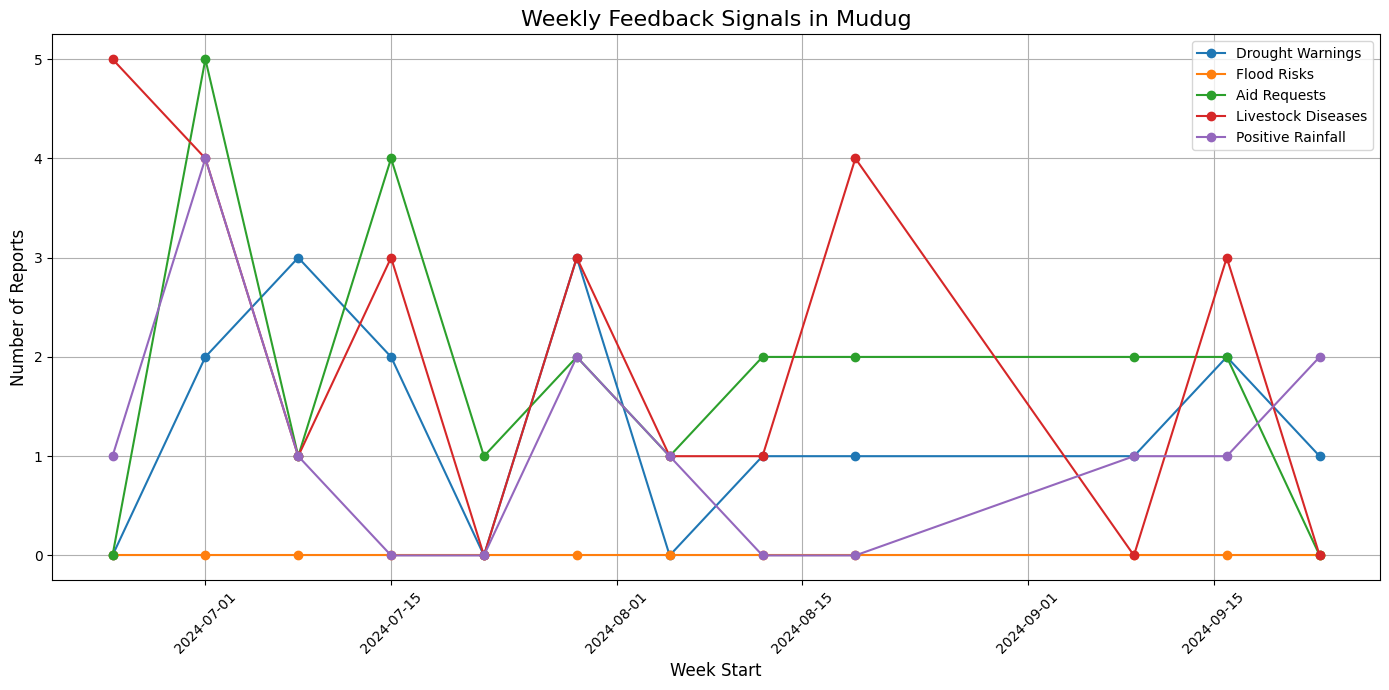

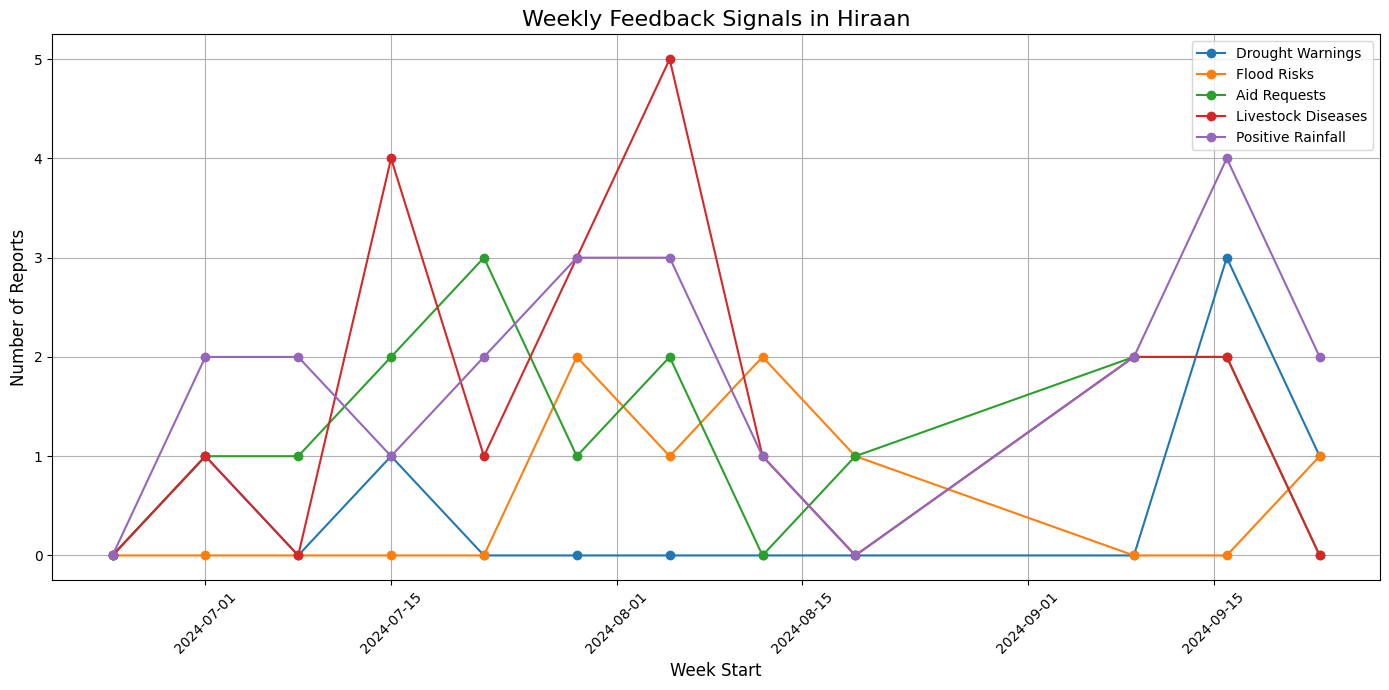

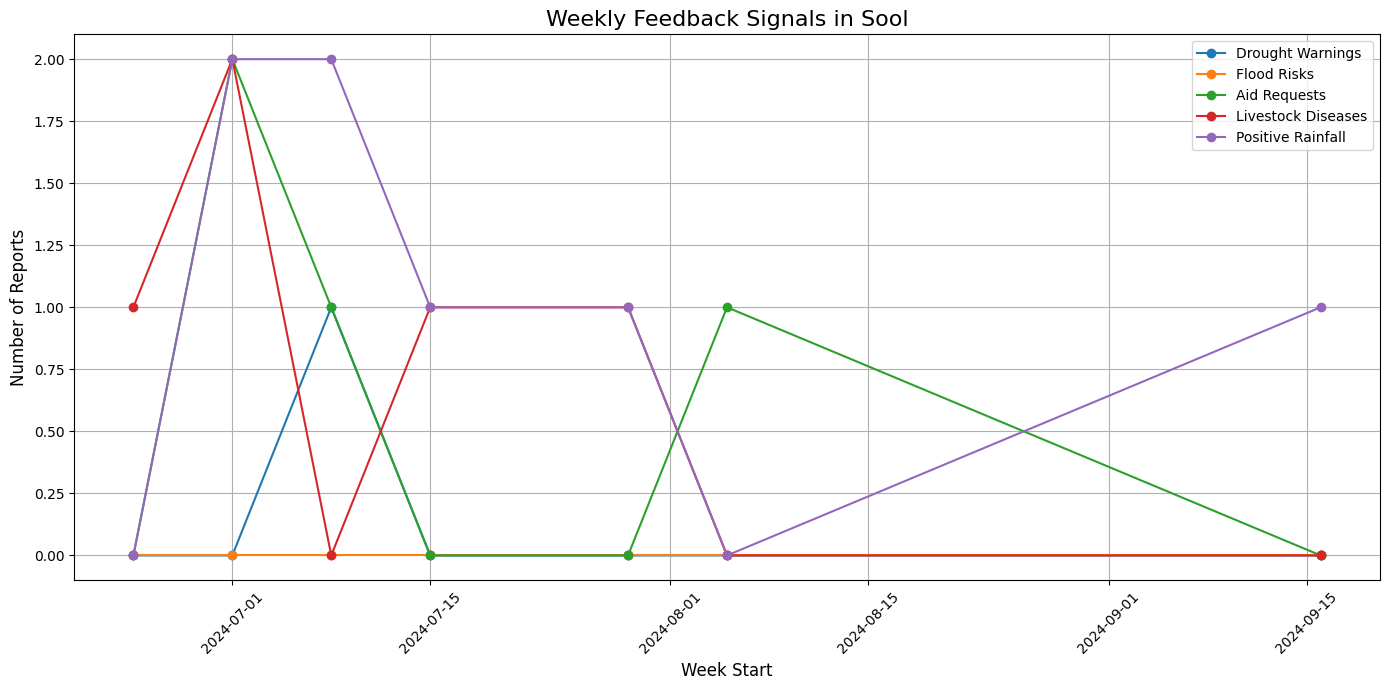

In [66]:
# Plot for 'Mudug'
plot_time_series(weekly_impact_df, area="Mudug")

# Plot for 'Hiraan'
plot_time_series(weekly_impact_df, area="Hiraan")

# Plot for 'Sool'
plot_time_series(weekly_impact_df, area="Sool")


In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path
from typing import Literal
import pandas as pd

PHASE_COLORS = {
    1: "#B7E4C7",  # Light green
    2: "#FFE066",  # Yellow
    3: "#FF9F1C",  # Orange
    4: "#FF4040",  # Red
    5: "#800020",  # Dark Red
}

def adjust_ipc_phases(geo_df: gpd.GeoDataFrame, weekly_impact_df: pd.DataFrame, week: pd.Timestamp) -> gpd.GeoDataFrame:
    """
    Adjust the IPC phases based on feedback impact for a given week.

    Args:
        geo_df (gpd.GeoDataFrame): The GeoDataFrame to modify.
        weekly_impact_df (pd.DataFrame): Weekly impact dataframe.
        week (pd.Timestamp): The week_start to apply.

    Returns:
        gpd.GeoDataFrame: Updated GeoDataFrame.
    """
    updated_geo_df = geo_df.copy()

    # Select feedback for the specific week
    week_feedback = weekly_impact_df[weekly_impact_df["week_start"] == week]

    # Apply changes based on feedback
    for _, row in week_feedback.iterrows():
        area = row["matched_area"]

        if area not in updated_geo_df["group_name"].values:
            continue  # Skip if no match found

        idx = updated_geo_df[updated_geo_df["group_name"] == area].index

        # Apply rules:
        phase_change = 0
        phase_change += row["high_impact_events"]  # Droughts, conflicts, floods increase phase
        phase_change -= row["rainfall_positives"]  # Rainfall decreases phase
        
        # Update and clip between 1 and 5
        updated_geo_df.loc[idx, "overall_phase_C"] = (
            updated_geo_df.loc[idx, "overall_phase_C"] + phase_change
        ).clip(lower=1, upper=5)

    return updated_geo_df

def plot_ipc_map_single(
    geo_df: gpd.GeoDataFrame,
    week: pd.Timestamp
) -> None:
    """
    Plot IPC phase map for a single week.

    Args:
        geo_df (gpd.GeoDataFrame): The GeoDataFrame containing IPC data.
        week (pd.Timestamp): The week date.

    Returns:
        None
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    # Assign colors
    geo_df["color"] = geo_df["overall_phase_C"].map(PHASE_COLORS)

    # Plot
    for phase, color in PHASE_COLORS.items():
        subset = geo_df[geo_df["overall_phase_C"] == phase]
        if not subset.empty:
            subset.plot(ax=ax, color=color, edgecolor="black", linewidth=0.5)

    ax.set_title(f"IPC Phase Map - Week Starting {week.strftime('%Y-%m-%d')}", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)
    ax.grid(True)
    ax.axis("equal")

    # Custom legend
    patches = [
        mpatches.Patch(color=color, label=f"Phase {phase}")
        for phase, color in PHASE_COLORS.items()
    ]
    fig.legend(handles=patches, title="IPC Phase", loc="lower center", ncol=5, fontsize=12)

    plt.suptitle("Somalia IPC Map (Dynamic Update)", fontsize=22)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()


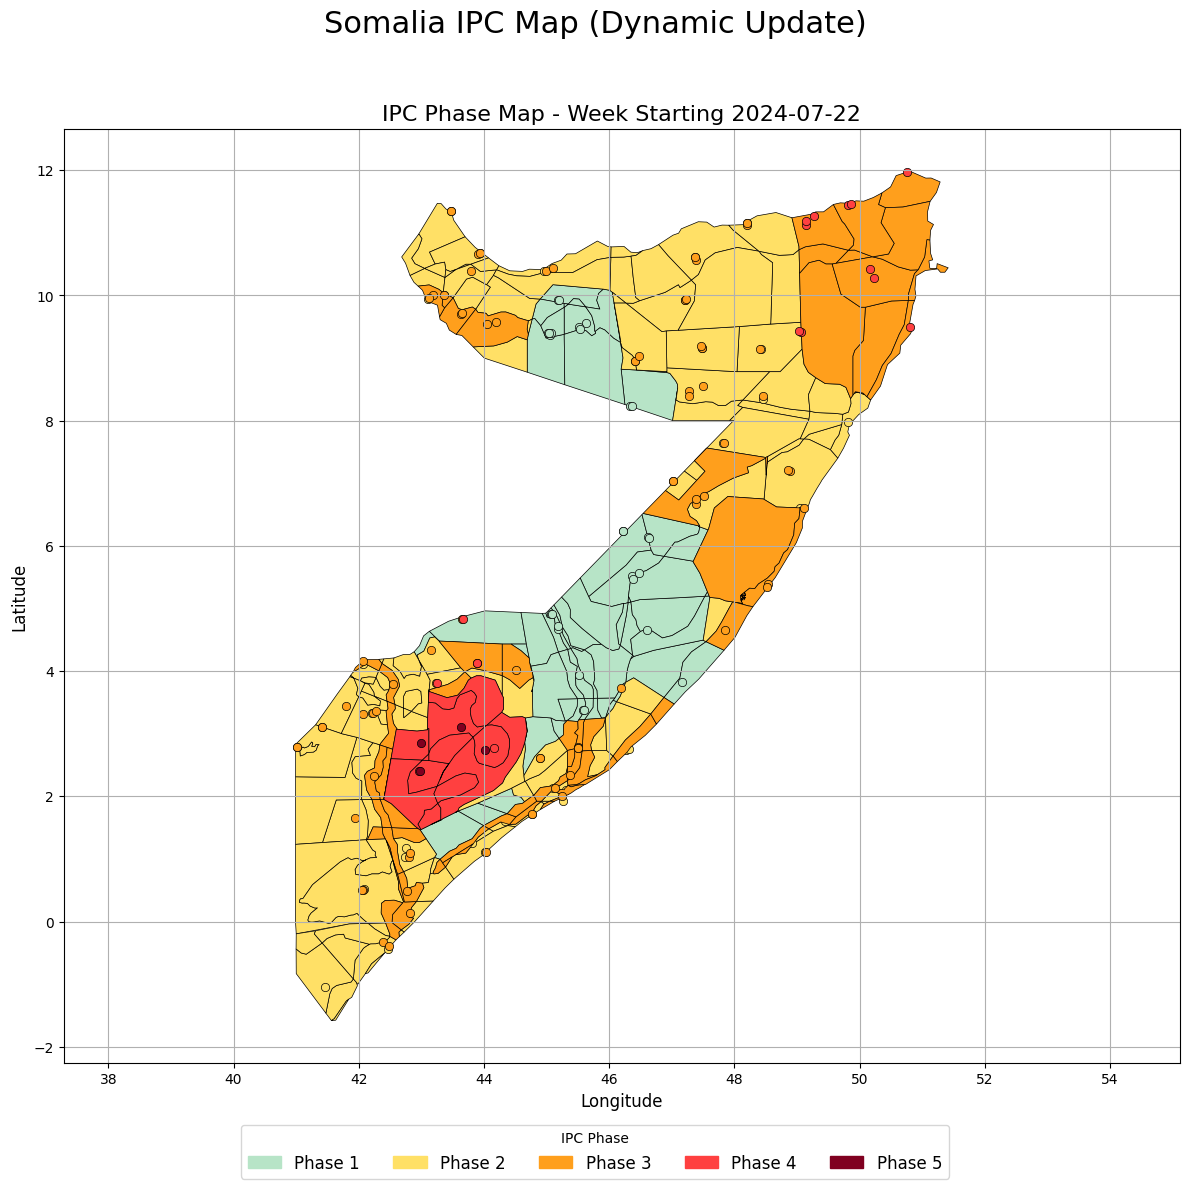

In [69]:
# Choose one week
week = pd.Timestamp("2024-07-22")

# Adjust phases
geo_updated = adjust_ipc_phases(geo_df, weekly_impact_df, week)

# Plot updated map
plot_ipc_map_single(geo_updated, week)


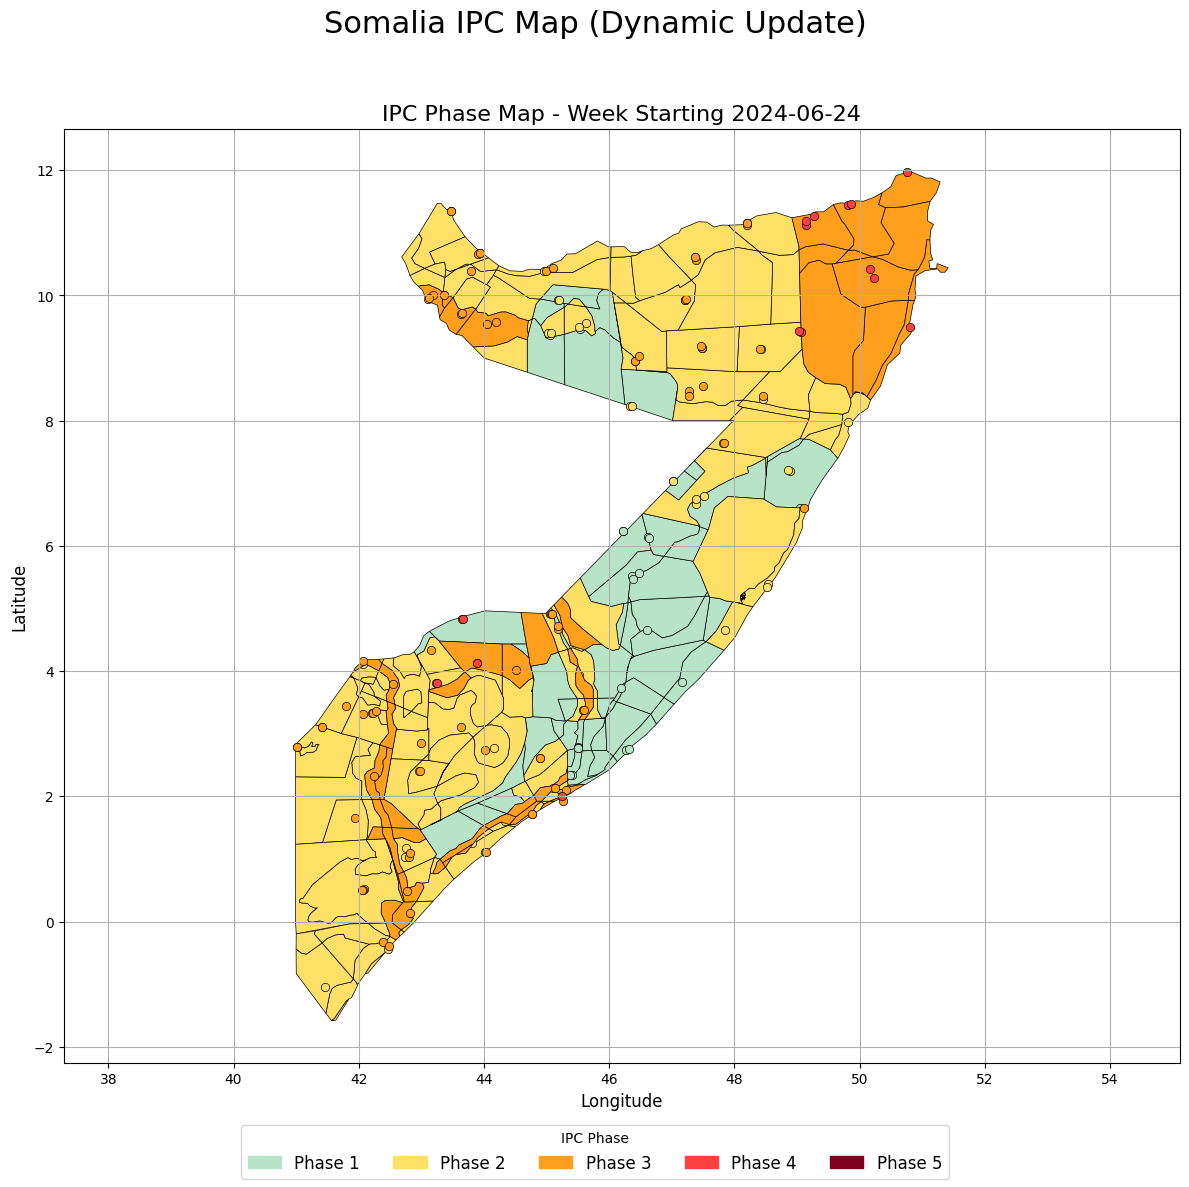

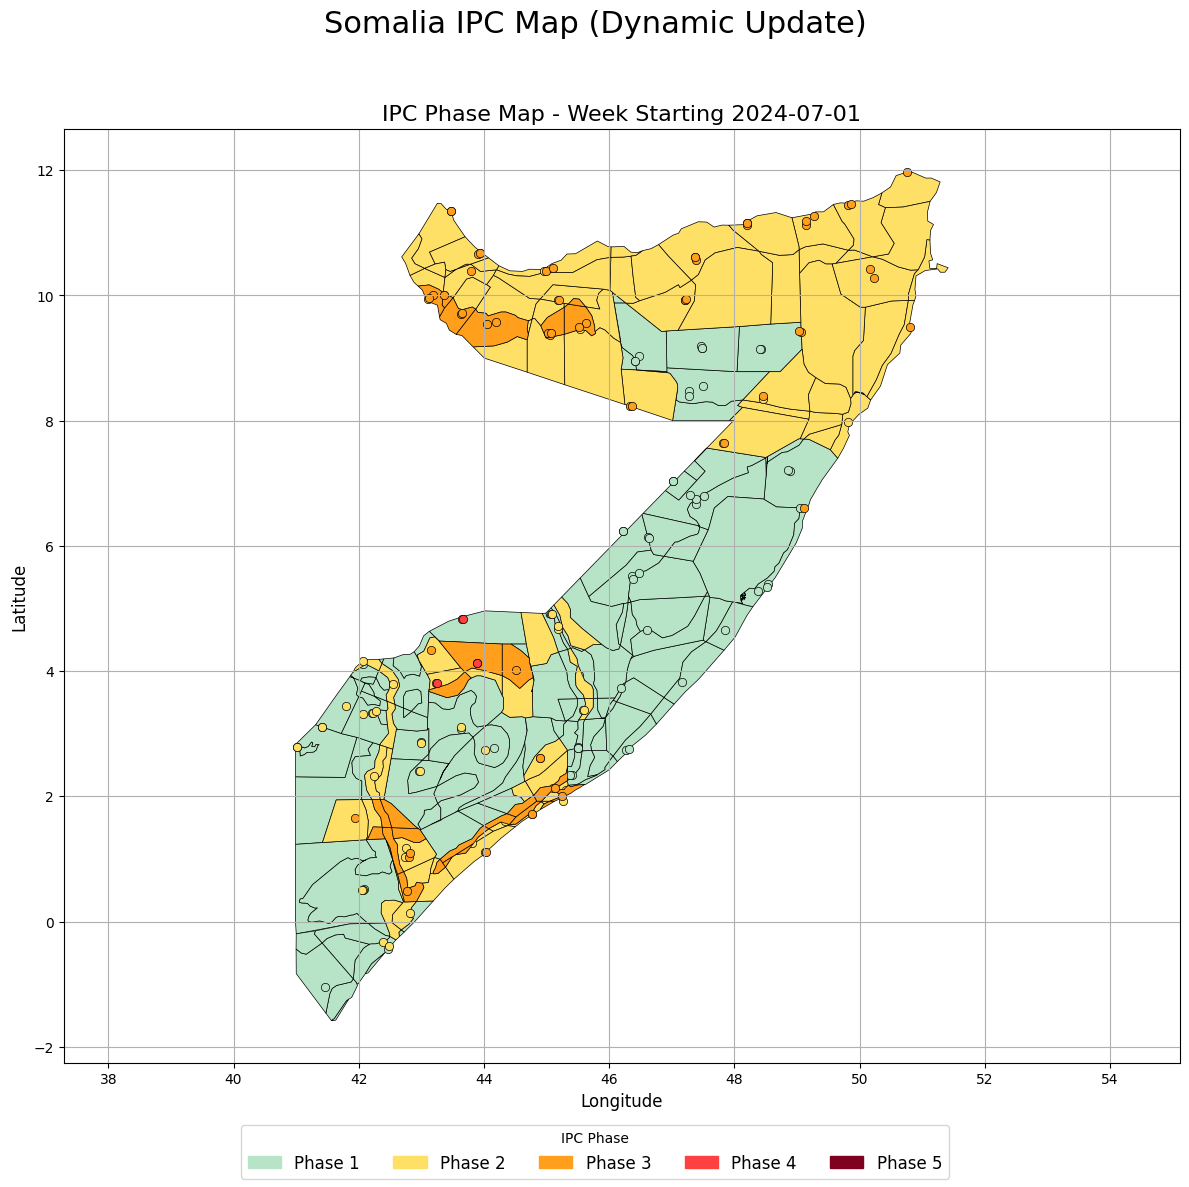

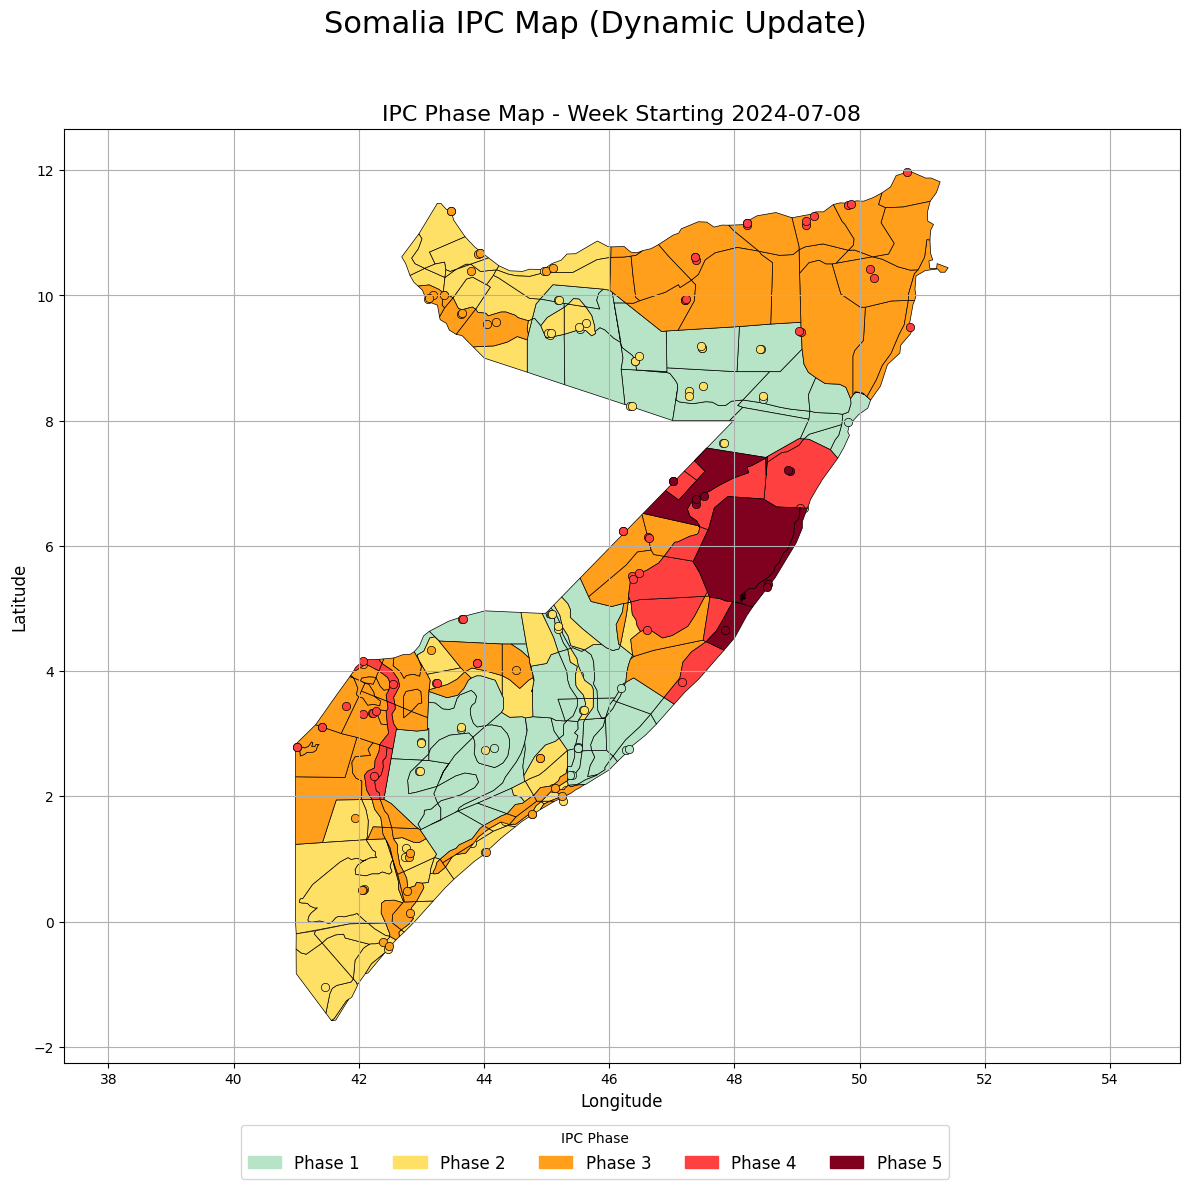

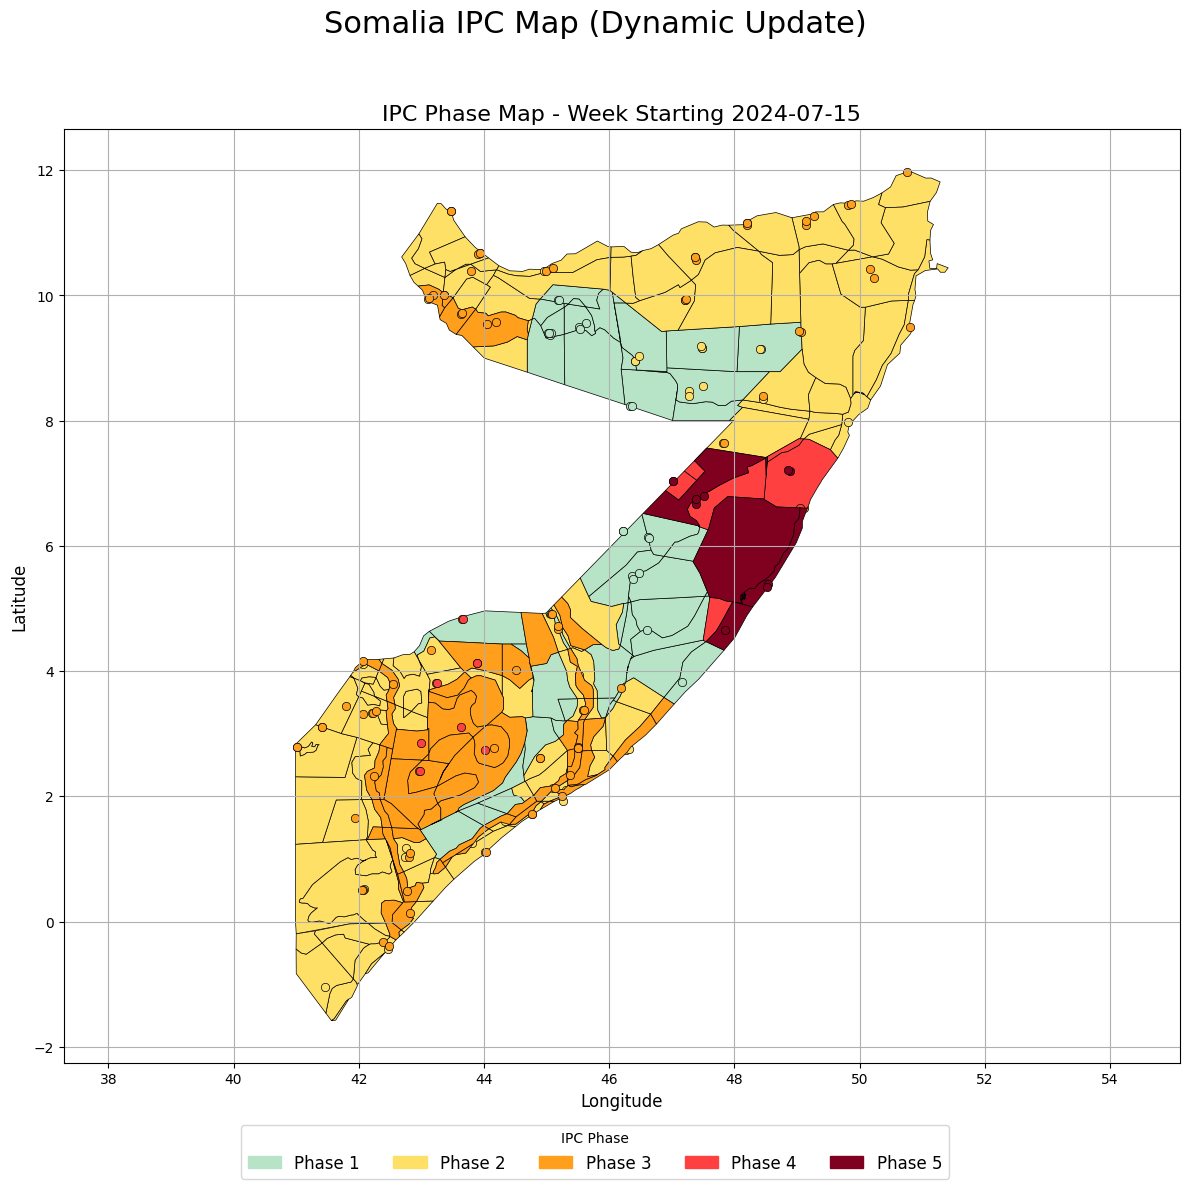

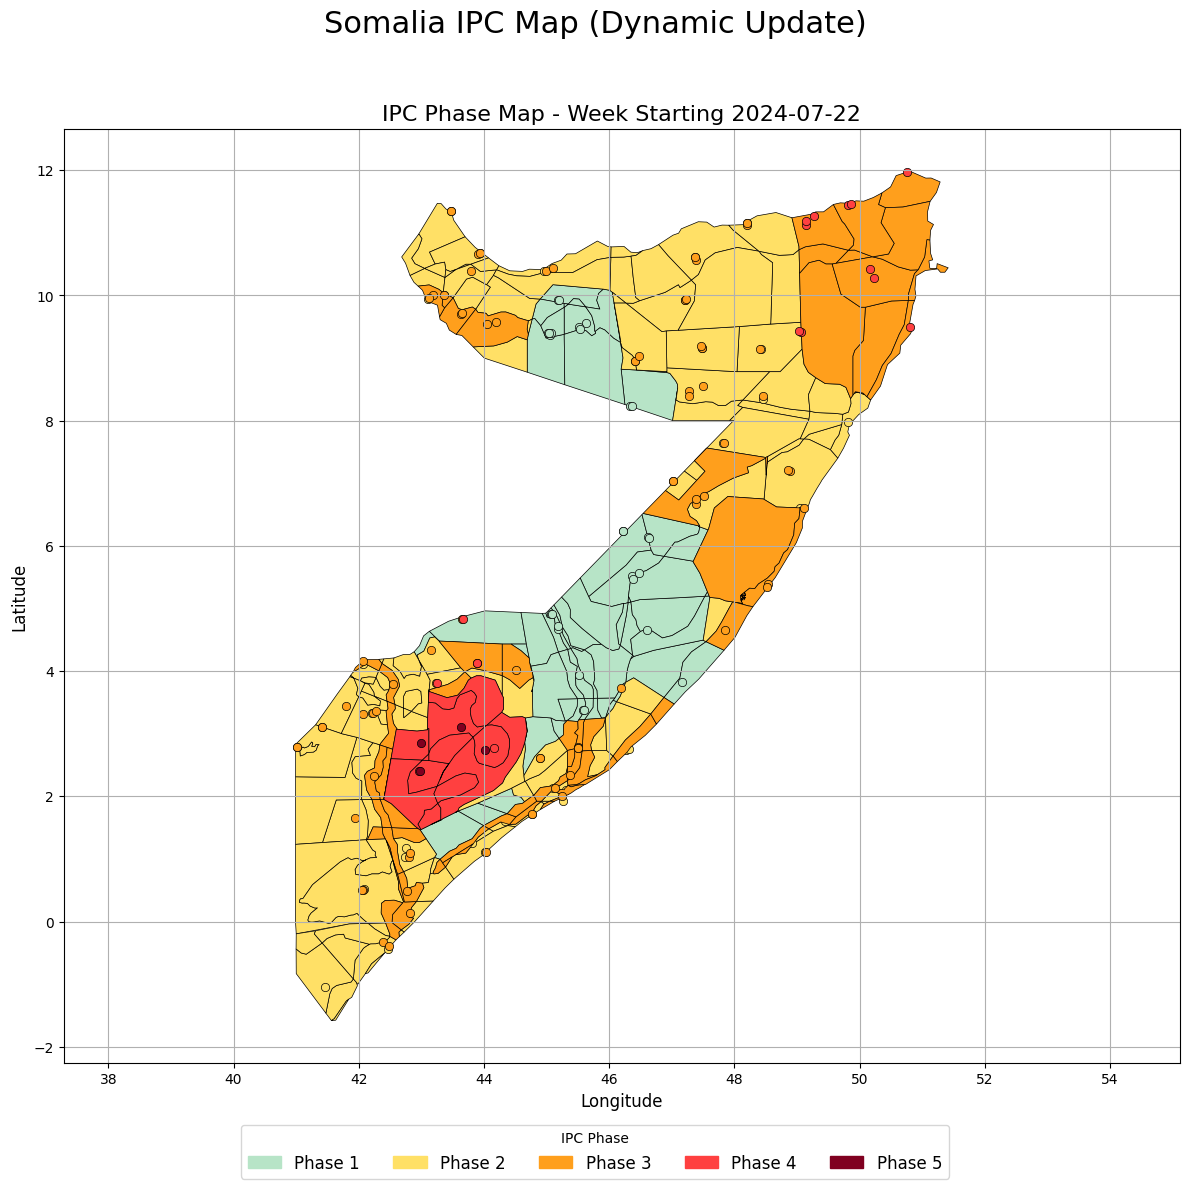

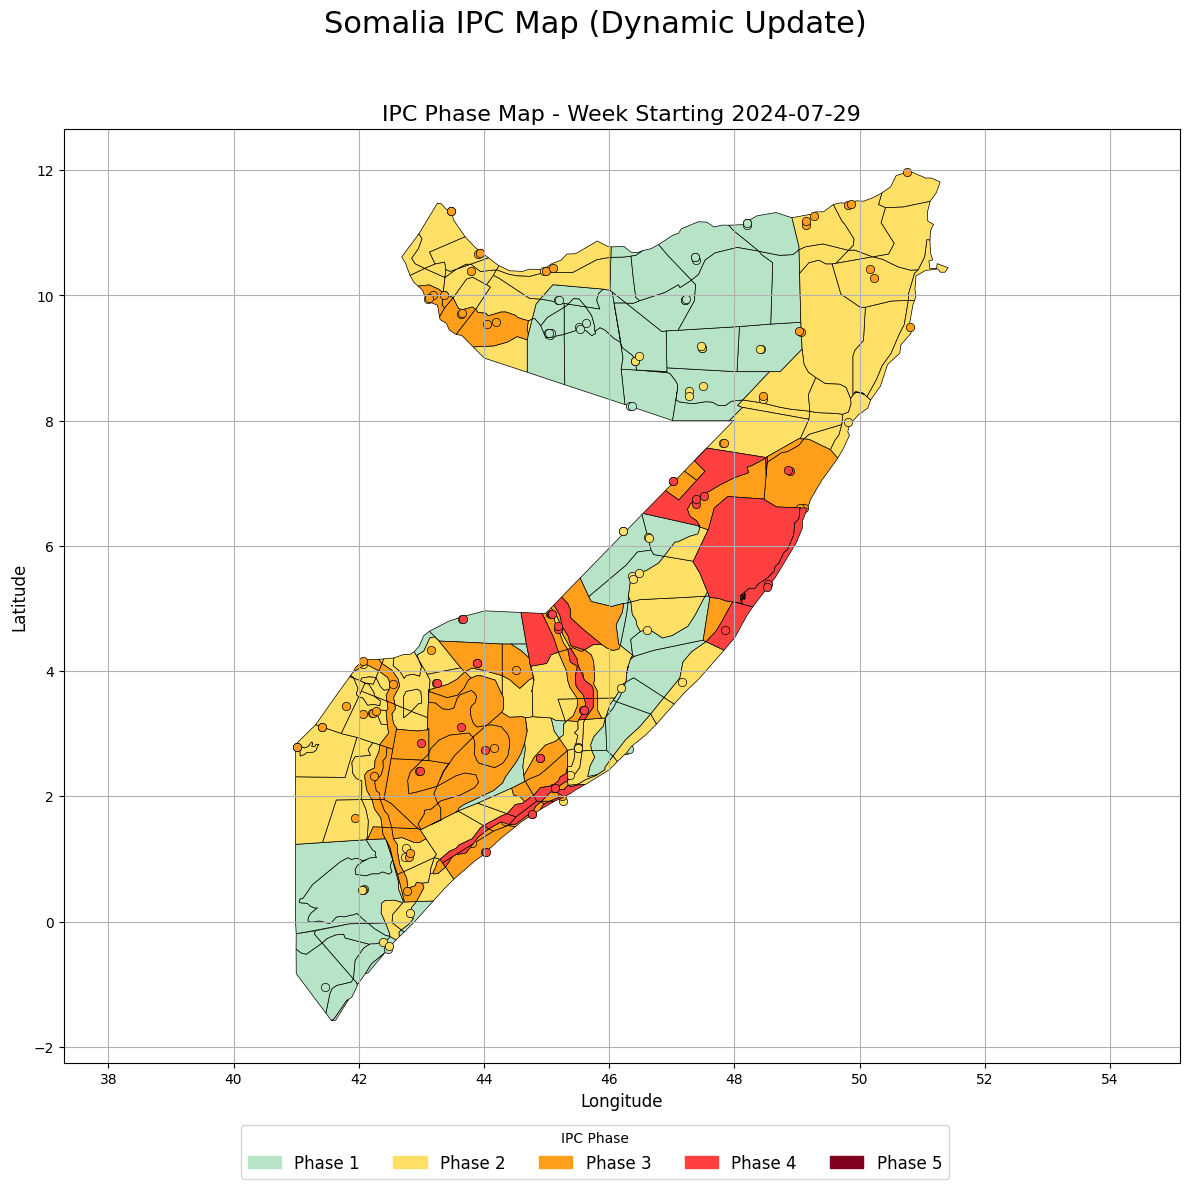

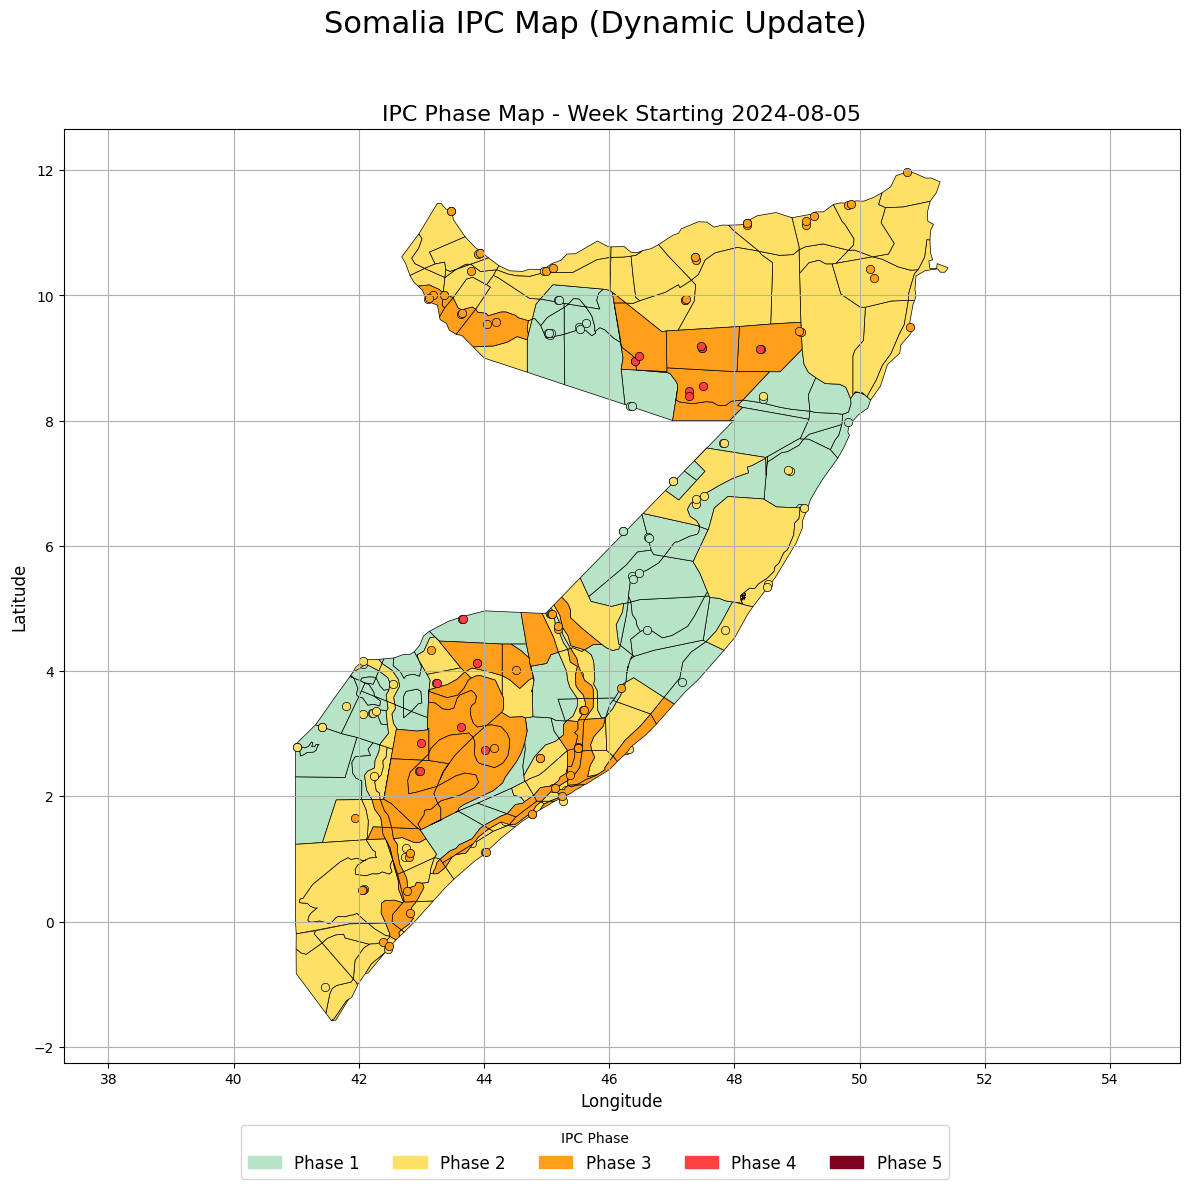

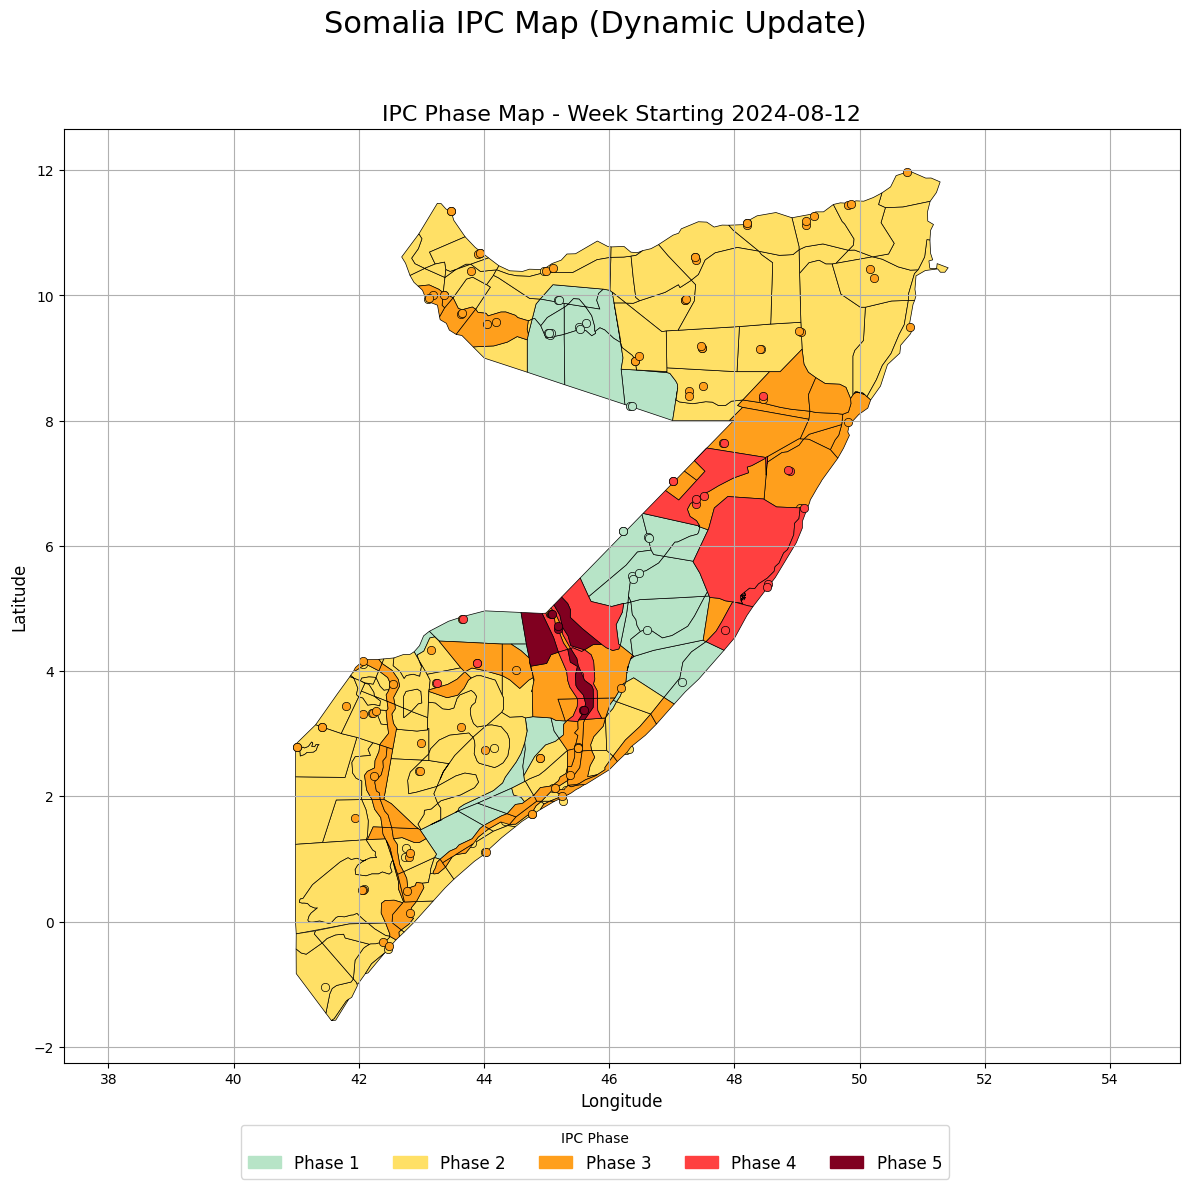

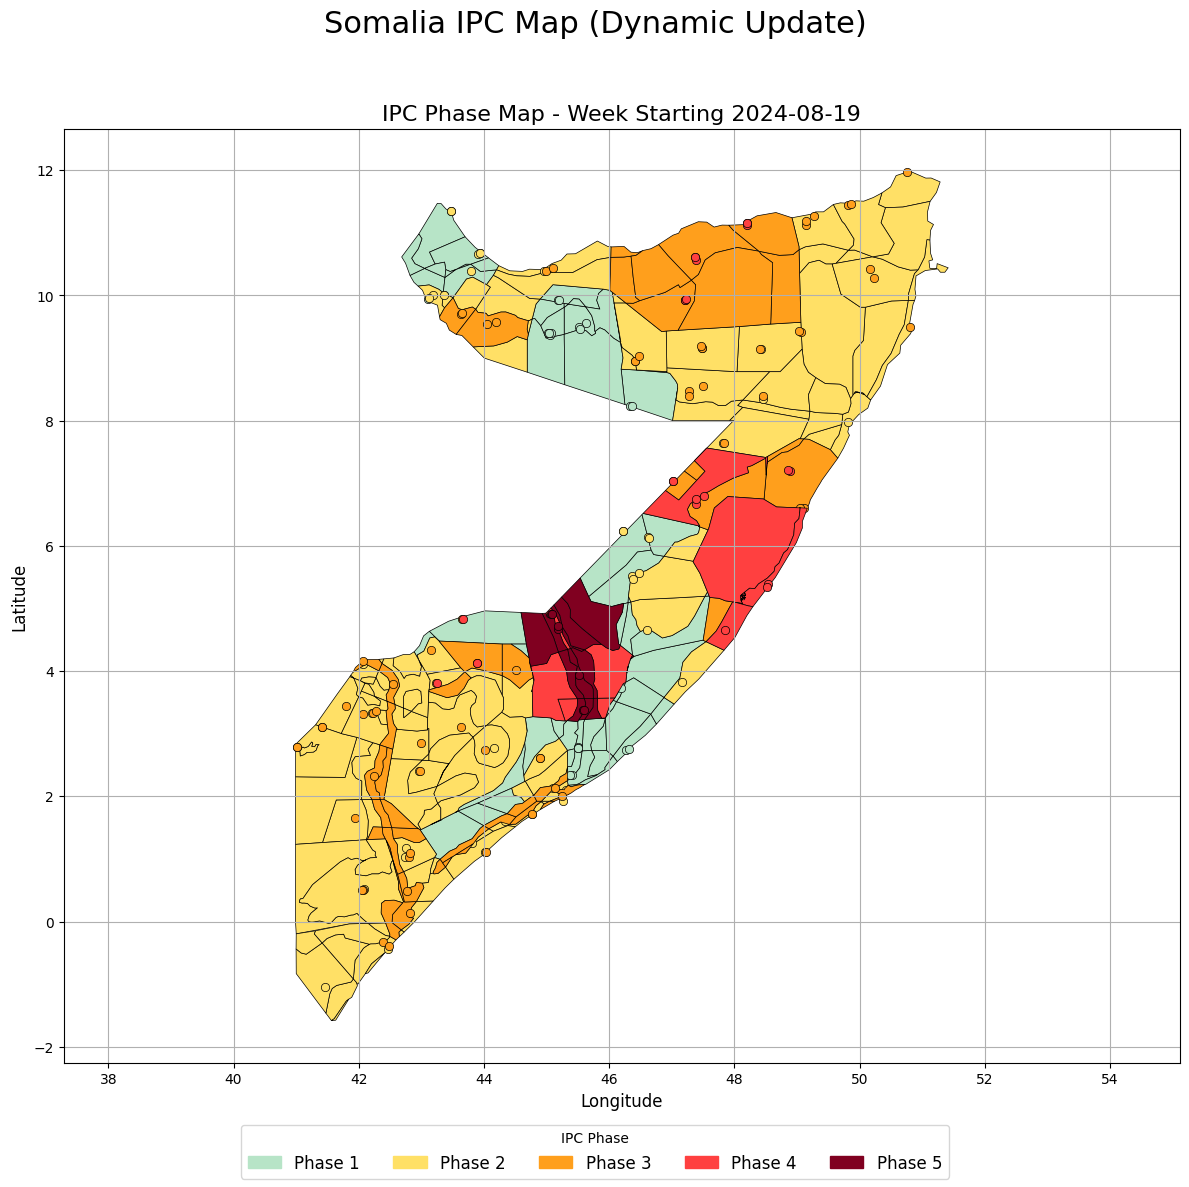

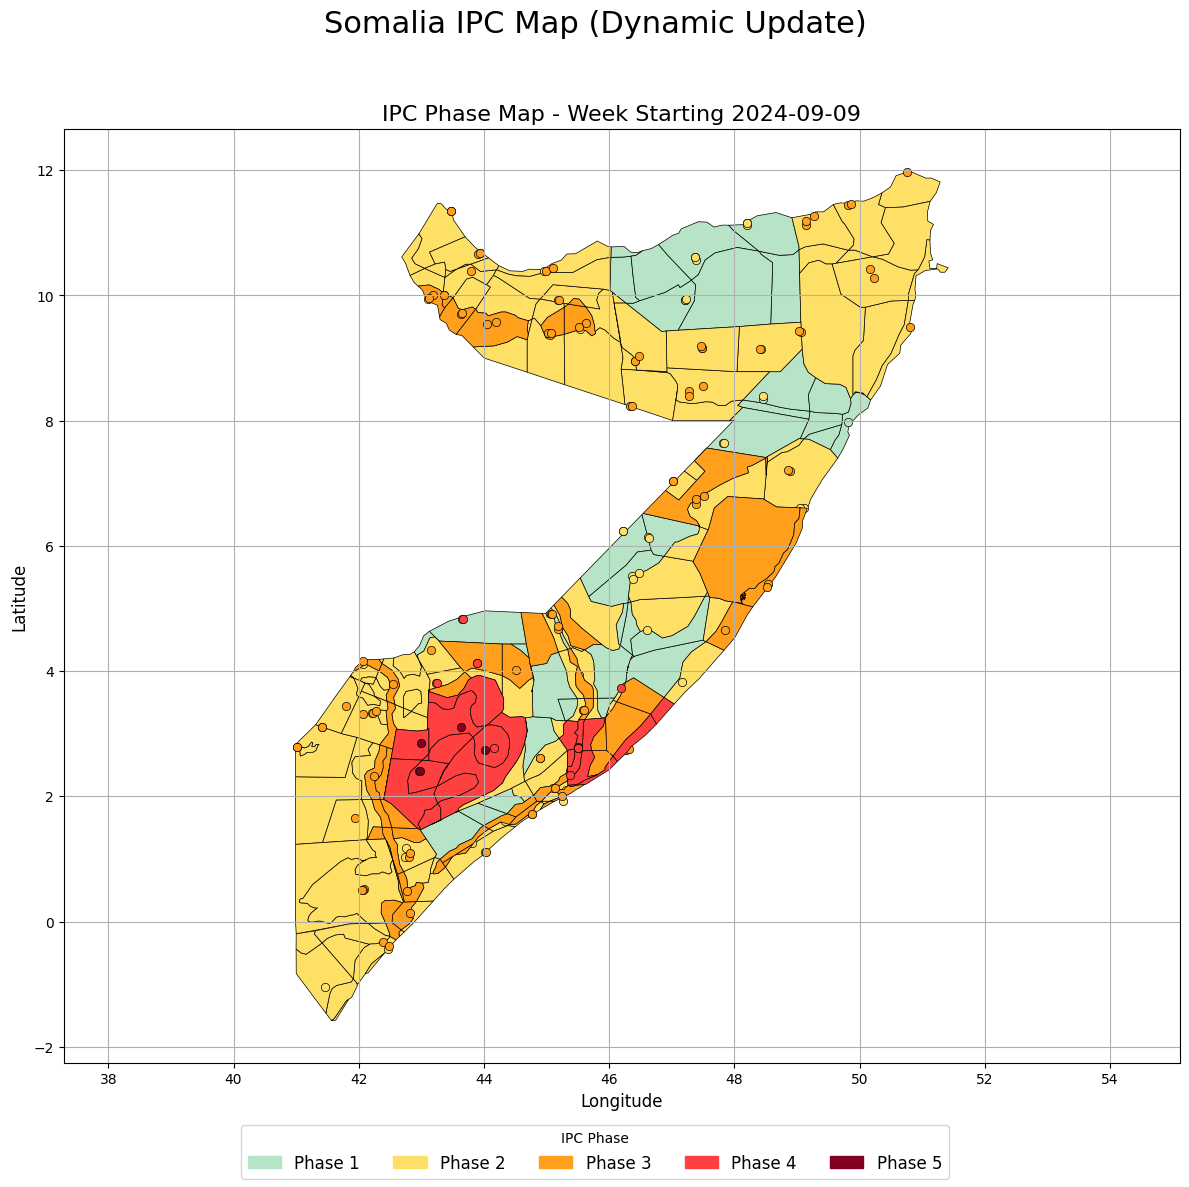

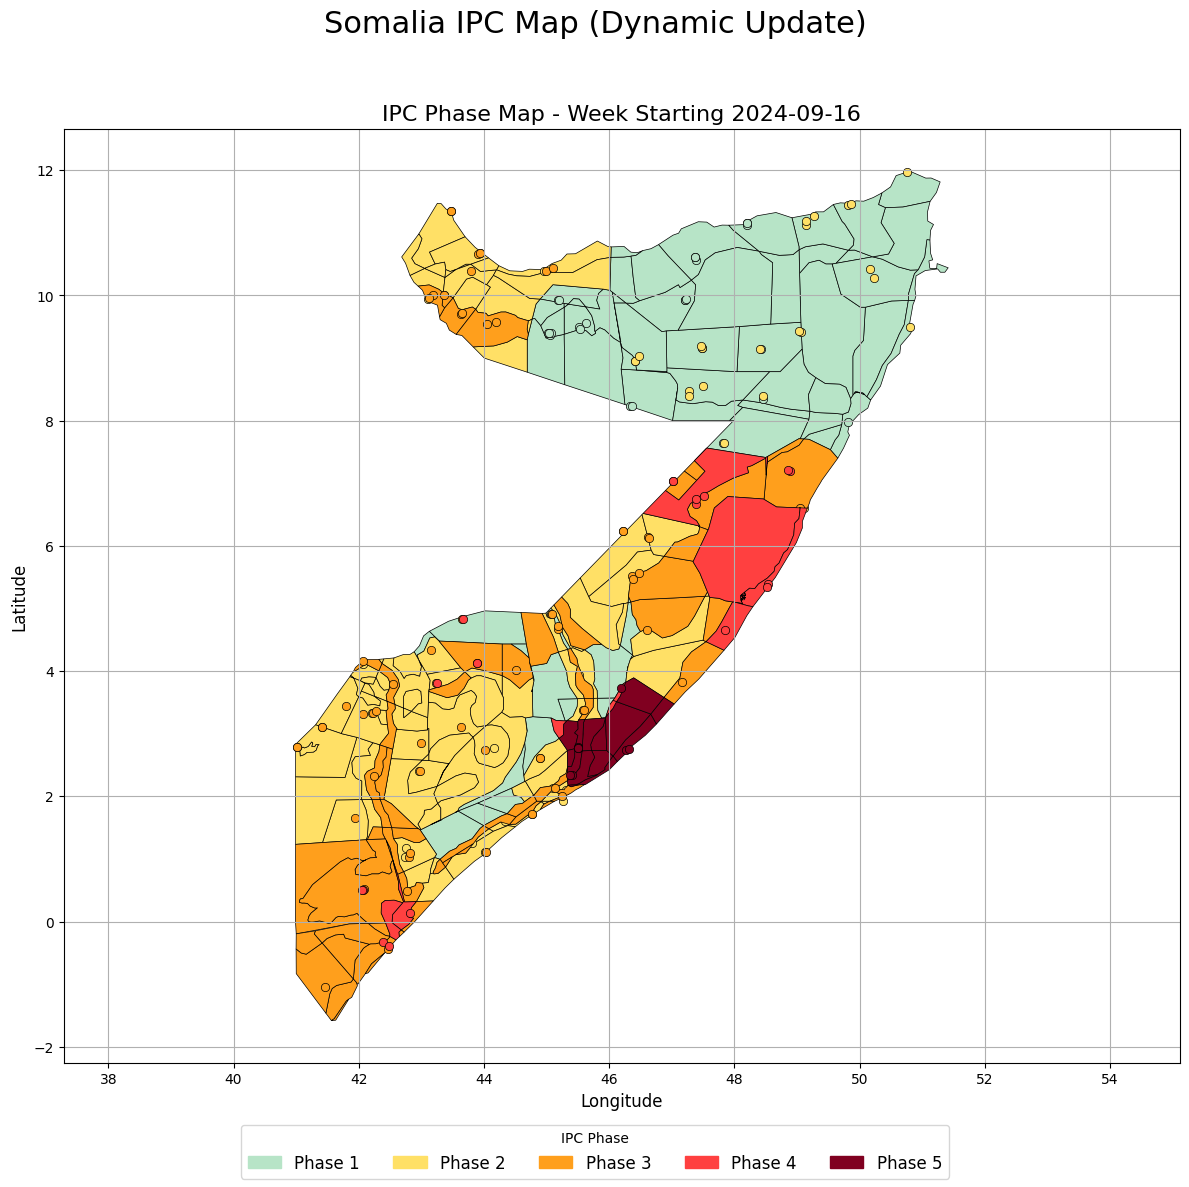

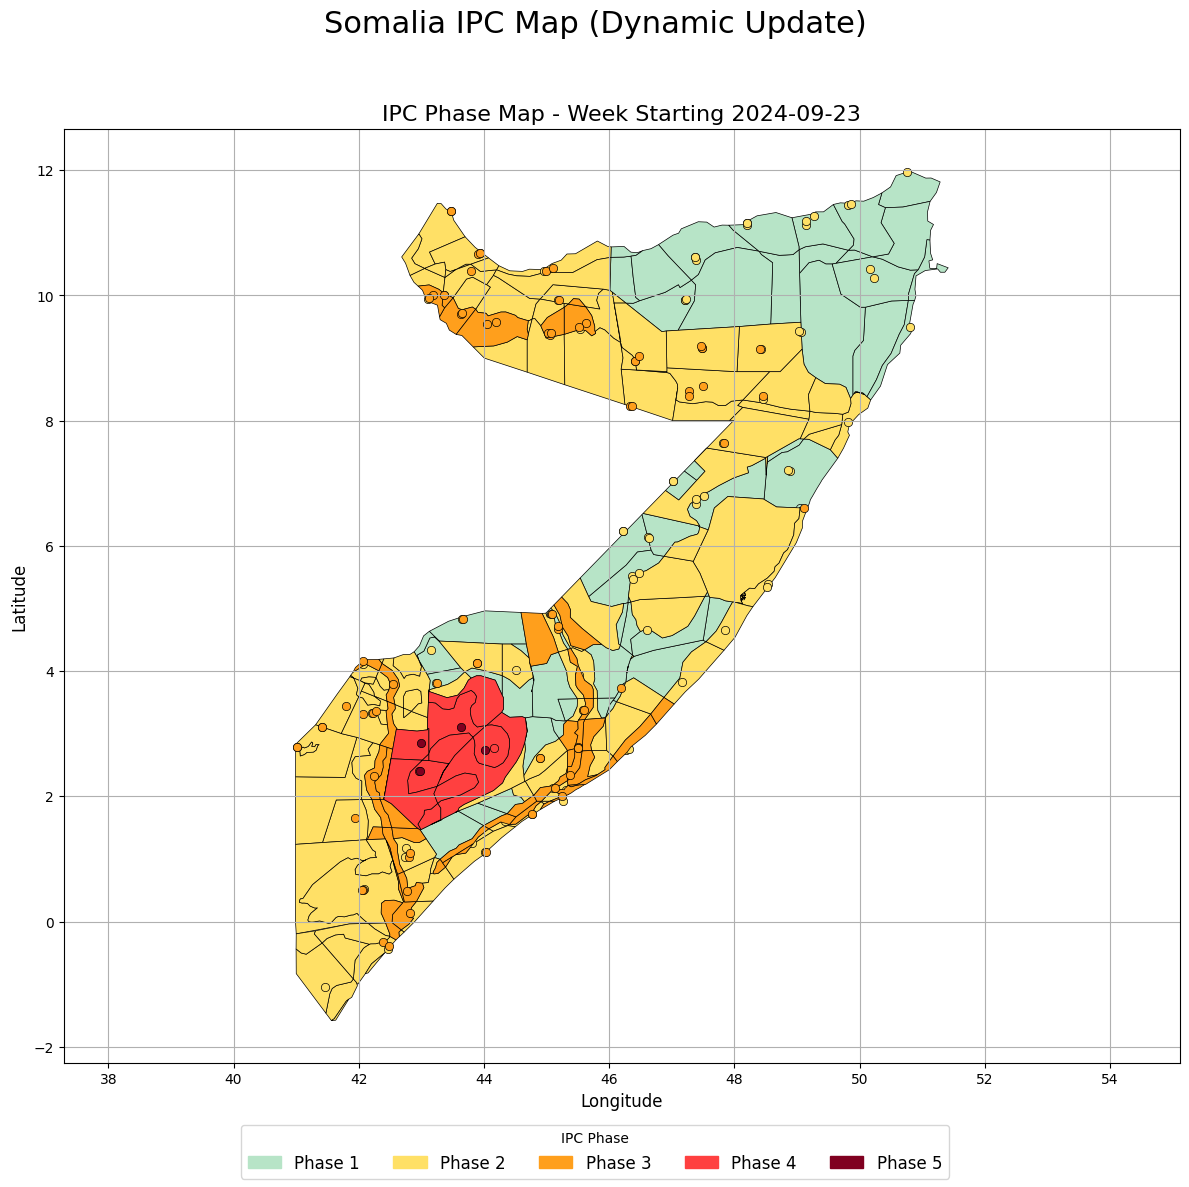

In [70]:
# For each unique week:
for week in sorted(weekly_impact_df["week_start"].unique()):
    geo_updated = adjust_ipc_phases(geo_df, weekly_impact_df, week)
    plot_ipc_map_single(geo_updated, week)


In [71]:
# New thresholds
THRESHOLDS = {
    "drought_warnings": 5,
    "flood_risks": 3,
    "aid_requests": 5,
    "livestock_diseases": 3,
    "rainfall_positives": 3,
}

# New weighted adjustment
PHASE_EFFECTS = {
    "drought_warnings": +1,
    "flood_risks": +1,
    "aid_requests": +1,
    "livestock_diseases": +1,
    "rainfall_positives": -1,
}

def adjust_ipc_phases_with_threshold(geo_df: gpd.GeoDataFrame, weekly_impact_df: pd.DataFrame, week: pd.Timestamp) -> gpd.GeoDataFrame:
    """
    Adjust the IPC phases based on feedback impact for a given week, using thresholds.
    """
    updated_geo_df = geo_df.copy()

    # Select feedback for the specific week
    week_feedback = weekly_impact_df[weekly_impact_df["week_start"] == week]

    for _, row in week_feedback.iterrows():
        area = row["matched_area"]

        if area not in updated_geo_df["group_name"].values:
            continue  # Skip if no match found

        idx = updated_geo_df[updated_geo_df["group_name"] == area].index

        # Initialize phase change
        phase_change = 0

        # Apply thresholds
        for event_type, threshold in THRESHOLDS.items():
            if row[event_type] >= threshold:
                phase_change += PHASE_EFFECTS[event_type]

        # Update and clip
        updated_geo_df.loc[idx, "overall_phase_C"] = (
            updated_geo_df.loc[idx, "overall_phase_C"] + phase_change
        ).clip(lower=1, upper=5)

    return updated_geo_df


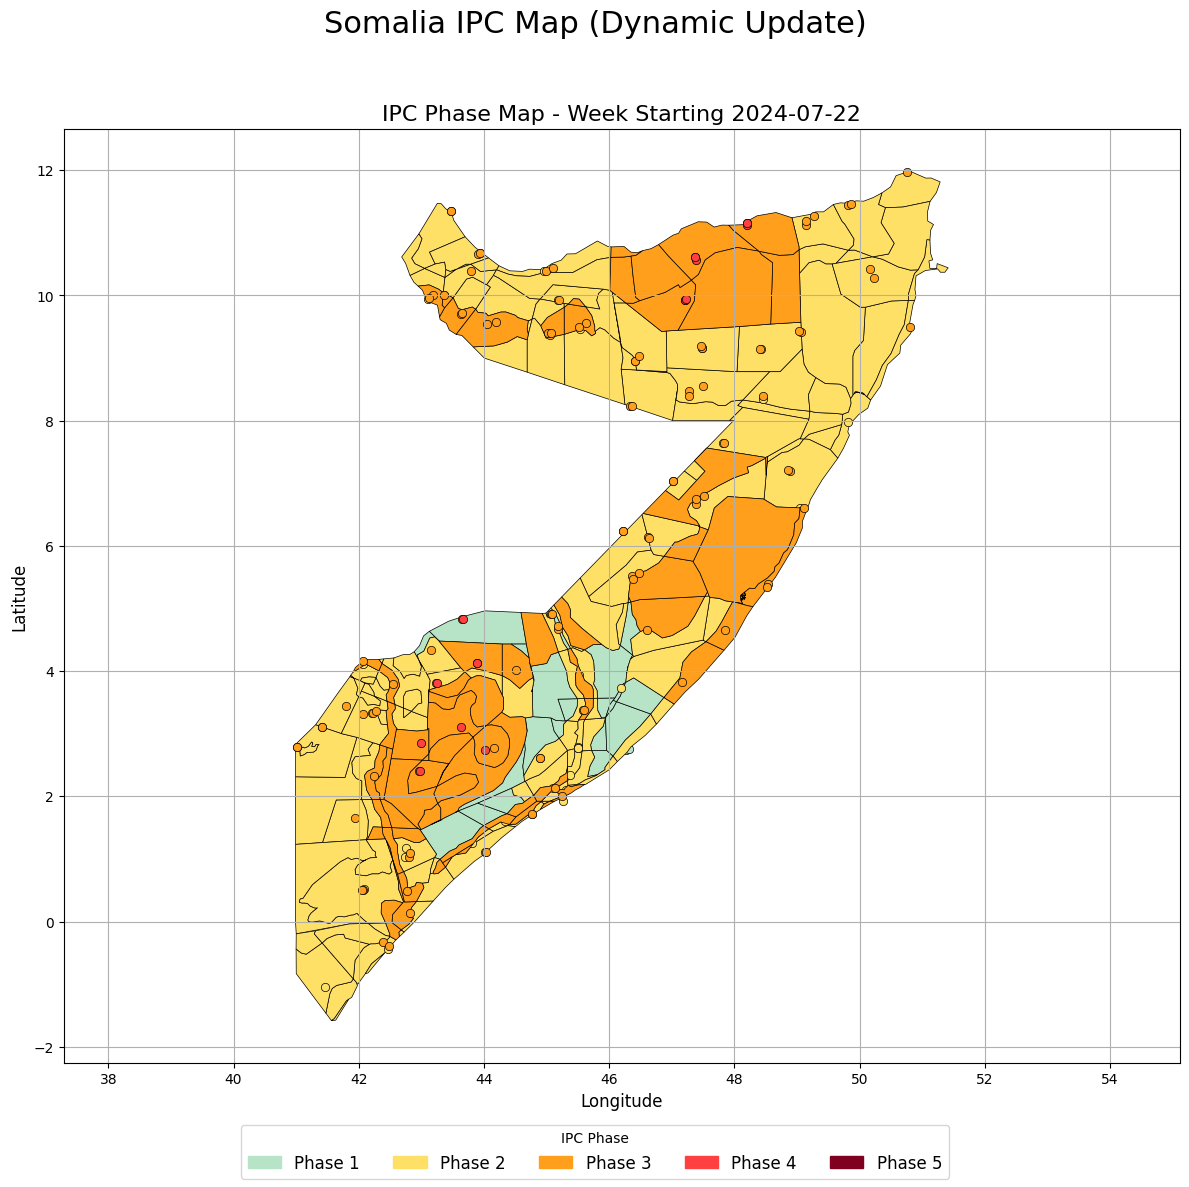

In [72]:
week = pd.Timestamp("2024-07-22")

geo_updated = adjust_ipc_phases_with_threshold(geo_df, weekly_impact_df, week)

plot_ipc_map_single(geo_updated, week)
